In [271]:
import pandas as pd

In [272]:
df = pd.read_csv("/Users/vins/Desktop/Datasets/Polynomial_Regression/Position_Salaries.csv")

In [273]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [274]:
X=df.iloc[:,1:2].values
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [275]:
y=df.iloc[:,-1].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [232]:
df.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

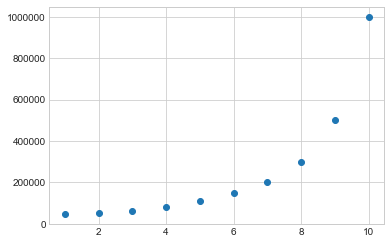

In [233]:
plt.scatter(X,y)

In [234]:
df.columns

Index(['Position', 'Level', 'Salary'], dtype='object')

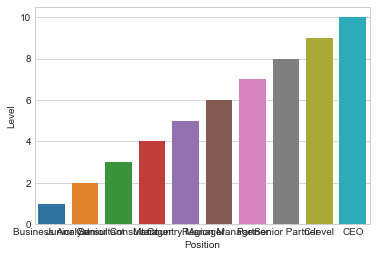

In [235]:
sns.barplot(x='Position',y='Level',data = df)

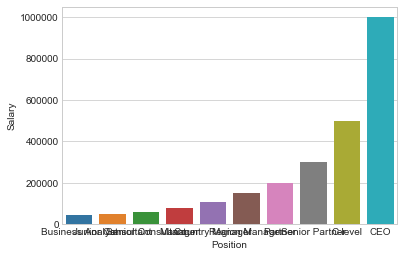

In [236]:
sns.barplot(x='Position',y='Salary',data = df)

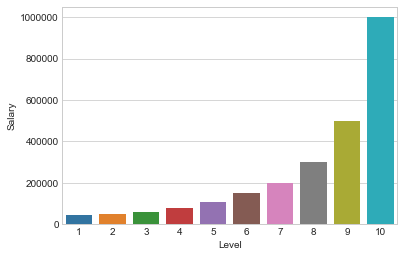

In [237]:
sns.barplot(x='Level',y='Salary',data = df)

In [238]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [239]:
df['Position'].unique()

array(['Business Analyst', 'Junior Consultant', 'Senior Consultant',
       'Manager', 'Country Manager', 'Region Manager', 'Partner',
       'Senior Partner', 'C-level', 'CEO'], dtype=object)

In [240]:
df=pd.get_dummies(df,columns=['Position'])

In [241]:
df

,Level,Salary,Position_Business Analyst,Position_C-level,Position_CEO,Position_Country Manager,Position_Junior Consultant,Position_Manager,Position_Partner,Position_Region Manager,Position_Senior Consultant,Position_Senior Partner
0,1,45000,1,0,0,0,0,0,0,0,0,0
1,2,50000,0,0,0,0,1,0,0,0,0,0
2,3,60000,0,0,0,0,0,0,0,0,1,0
3,4,80000,0,0,0,0,0,1,0,0,0,0
4,5,110000,0,0,0,1,0,0,0,0,0,0
5,6,150000,0,0,0,0,0,0,0,1,0,0
6,7,200000,0,0,0,0,0,0,1,0,0,0
7,8,300000,0,0,0,0,0,0,0,0,0,1
8,9,500000,0,1,0,0,0,0,0,0,0,0
9,10,1000000,0,0,1,0,0,0,0,0,0,0


In [243]:
df.columns

Index(['Level', 'Salary', 'Position_Business Analyst', 'Position_C-level',
       'Position_CEO', 'Position_Country Manager',
       'Position_Junior Consultant', 'Position_Manager', 'Position_Partner',
       'Position_Region Manager', 'Position_Senior Consultant',
       'Position_Senior Partner'],
      dtype='object')

In [244]:
from sklearn.linear_model import LinearRegression

In [245]:
lin_reg=LinearRegression()

In [246]:
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

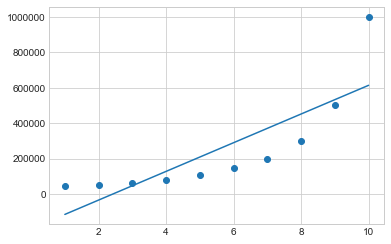

In [247]:
plt.scatter(X,y)
plt.plot(x,lin_reg.predict(X))

In [248]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)

In [249]:
X_poly = poly_reg.fit_transform(X)
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [276]:
lin_reg2 = LinearRegression()

In [277]:
lin_reg2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

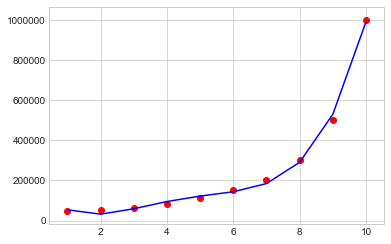

In [278]:
plt.plot(X,lin_reg2.predict(X_poly),color='blue')
plt.scatter(X,y,color='red')

In [279]:
lin_reg2.predict(poly_reg.fit_transform(6.5))

array([158862.4526516])

In [280]:
lin_reg.predict(6.5)

array([330378.78787879])

In [281]:
from sklearn.tree import DecisionTreeRegressor


In [282]:
dec_reg = DecisionTreeRegressor(random_state=0)

In [283]:
dec_reg.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [284]:
dec_reg.predict(6.5)

array([150000.])

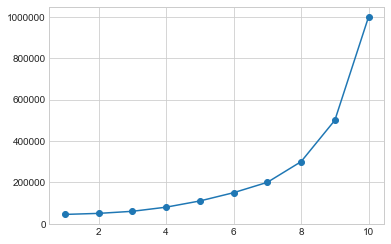

In [287]:
plt.scatter(X,y)
plt.plot(X,dec_reg.predict(X))

In [298]:
import numpy as np

In [301]:
X_grid=np.arange(min(x),max(x),0.01)

In [302]:
X_grid

array([1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1 ,
       1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 , 1.21,
       1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31, 1.32,
       1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42, 1.43,
       1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52, 1.53, 1.54,
       1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63, 1.64, 1.65,
       1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75, 1.76,
       1.77, 1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87,
       1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98,
       1.99, 2.  , 2.01, 2.02, 2.03, 2.04, 2.05, 2.06, 2.07, 2.08, 2.09,
       2.1 , 2.11, 2.12, 2.13, 2.14, 2.15, 2.16, 2.17, 2.18, 2.19, 2.2 ,
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31,
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.

In [306]:
X_grid = X_grid.reshape(len(X_grid),1)

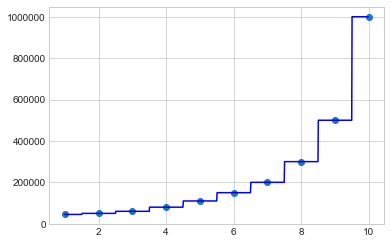

In [315]:
plt.scatter(X,y)
plt.plot(X_grid,dec_reg.predict(X_grid),color="blue")


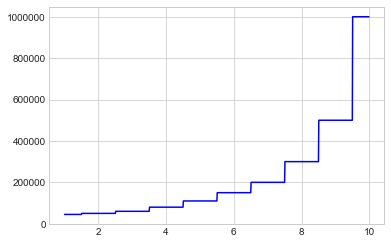

In [314]:
plt.plot(X_grid,dec_reg.predict(X_grid),color="blue")

In [320]:
from sklearn.ensemble import RandomForestRegressor

In [321]:
rf_reg = RandomForestRegressor(n_estimators=10,random_state=0)

In [322]:
rf_reg.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [323]:
X_grid=np.arange(min(x),max(x),0.01)

In [324]:
X_grid = X_grid.reshape(len(X_grid),1)

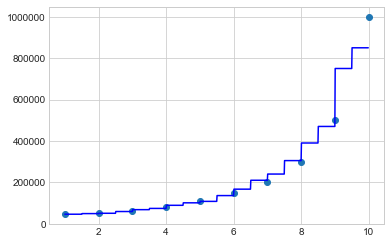

In [326]:
plt.scatter(X,y)
plt.plot(X_grid,rf_reg.predict(X_grid),color="blue")

In [327]:
rf_reg.predict(6.5)

array([167000.])